In [91]:
# EDA on Customer Churn Dataset

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

datadf = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/CustomerChurn.csv?raw=True')
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
datadf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
#part:: DS Understanding
#check various attributes of data rows * cols, cols and dtypes
print('shape of DF:',datadf.shape)
print('Columns in DF:',datadf.columns)
print('Index of DF:',datadf.index)

shape of DF: (7043, 21)
Columns in DF: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index of DF: RangeIndex(start=0, stop=7043, step=1)


In [94]:
# describe() function to check the statistical summary of numerical columns
#Total charges shpuld be numerical , only int and float are considered or is returned 

datadf.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [95]:
#check if any outliers #sns.countplot(data=datadf[['tenure','MonthlyCharges']])


In [96]:
#check the no of customers churned

datadf['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [97]:
#check in % manner:

datadf['Churn'].value_counts() / len(datadf['Churn']) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

           index    0
0     customerID  0.0
1         gender  0.0
2  SeniorCitizen  0.0
3        Partner  0.0
4     Dependents  0.0
                 0
customerID     0.0
gender         0.0
SeniorCitizen  0.0
Partner        0.0
Dependents     0.0


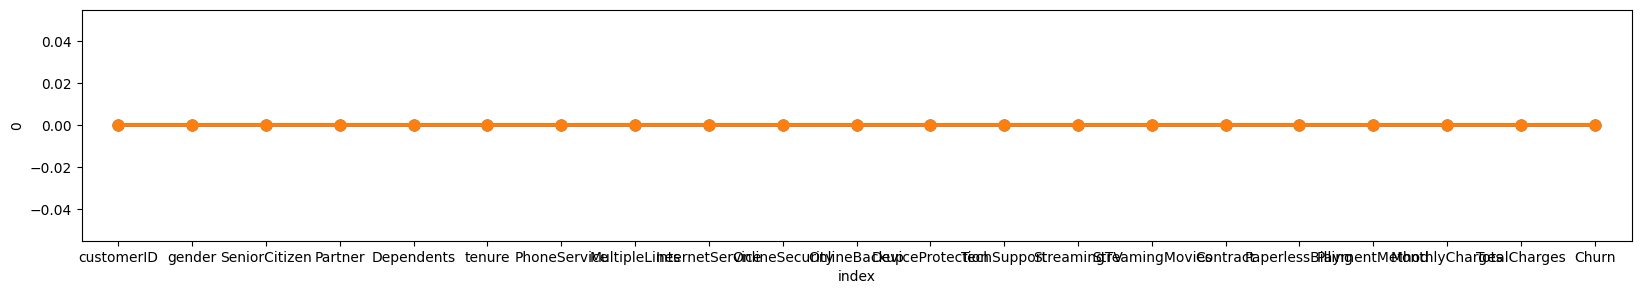

In [98]:
missing = pd.DataFrame(datadf.isnull().sum()*100 / len(datadf)).reset_index()
#print(missing.transpose())
print(missing.head())
plt.figure(figsize=(20,3))

# or 

sns.pointplot(data=missing, x='index', y=0)
missing1 = pd.DataFrame(datadf.isnull().sum()*100 / len(datadf))
sns.pointplot(data=missing1, x=missing1.index, y=0)
print(missing1.head())

In [99]:
# part2 :: Data Cleaning 
# take a copy from Original DS - common practice
datadf_clean = datadf.copy()


In [100]:
# convert string to numeric, coerce will convert non numeric to NaN
datadf_clean['TotalCharges'] = pd.to_numeric(datadf_clean['TotalCharges'],errors='coerce')
datadf_clean.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [101]:
# 
datadf_clean.loc[datadf_clean['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [102]:
datadf_clean.dropna(how='any',inplace=True)
datadf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [103]:
#Identify the max and min values for Feature Binning 
print('Max value of Tenure', datadf_clean['tenure'].max())
print('Min value of Tenure', datadf_clean['tenure'].min())

Max value of Tenure 72
Min value of Tenure 1


In [104]:
# instead of hardcoding, create the bins and labels dynamically
labels = ["{0}-{1}".format(i, i + 11) for i in range(1, 72, 12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [105]:
# create the range dynamically for bins too . look out for even range / labels
datadf_clean['Tenure_bin'] = pd.cut(datadf_clean['tenure'], range(1, 80, 12), labels=labels, right=False)
datadf_clean['Tenure_bin'].value_counts() 

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: Tenure_bin, dtype: int64

In [106]:
#drop the unrequired columns 

datadf_clean.drop(columns=['customerID','tenure'],inplace=True)
datadf_clean.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


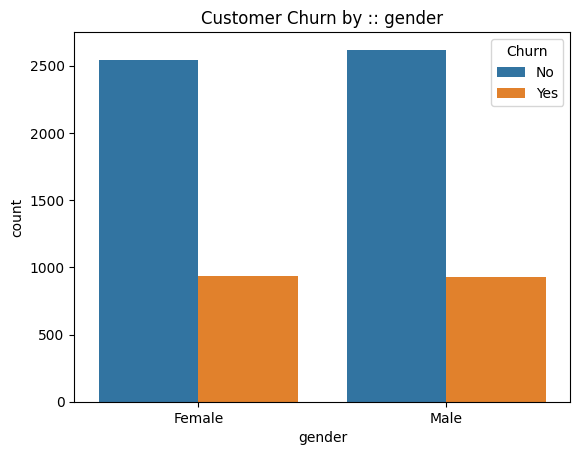

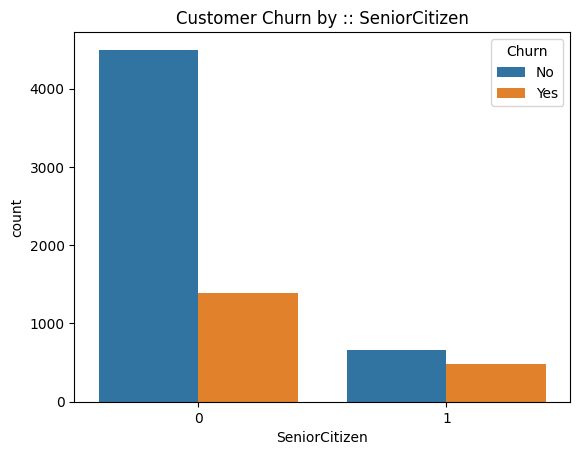

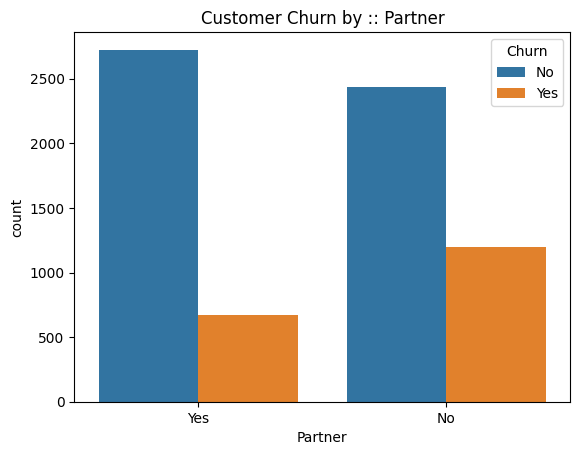

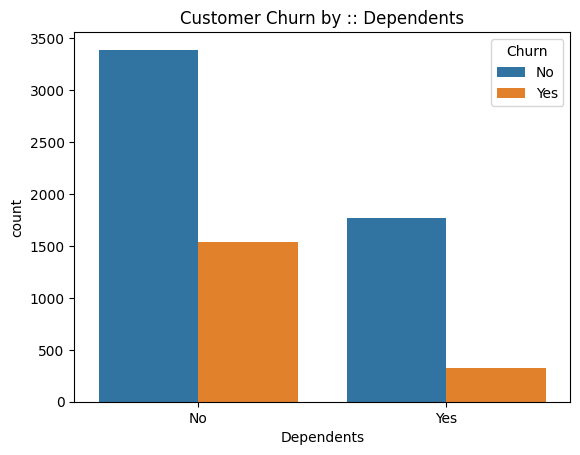

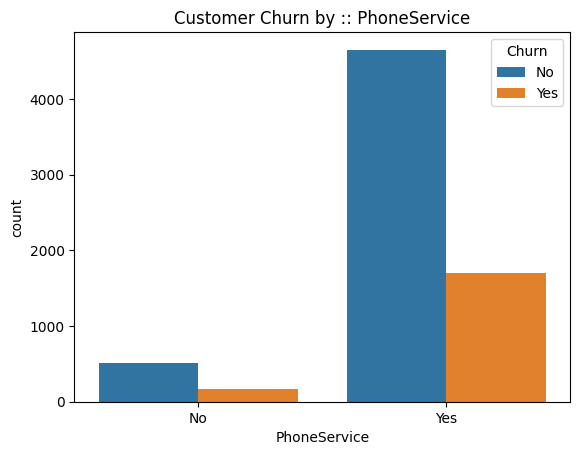

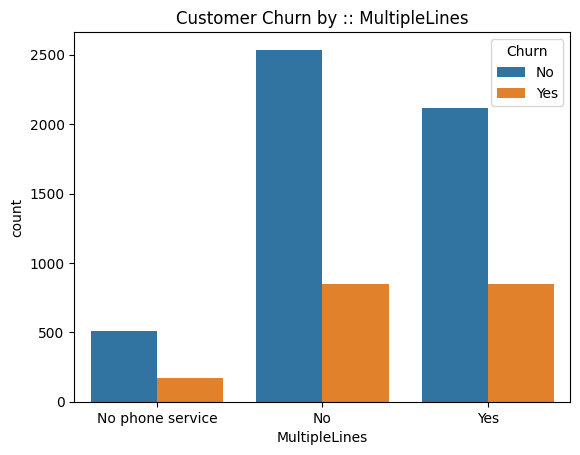

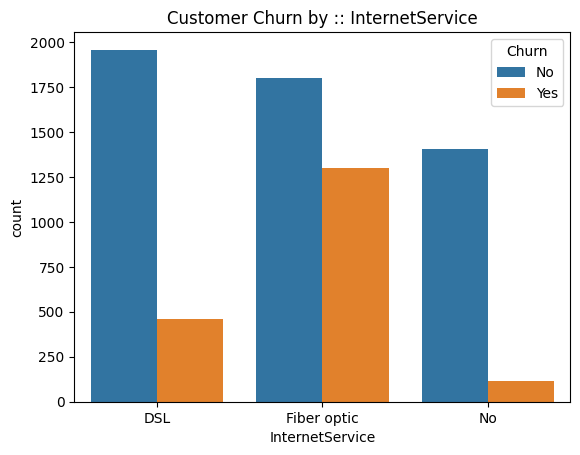

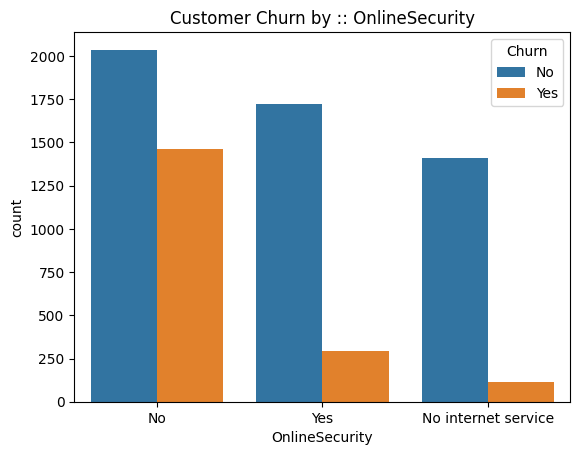

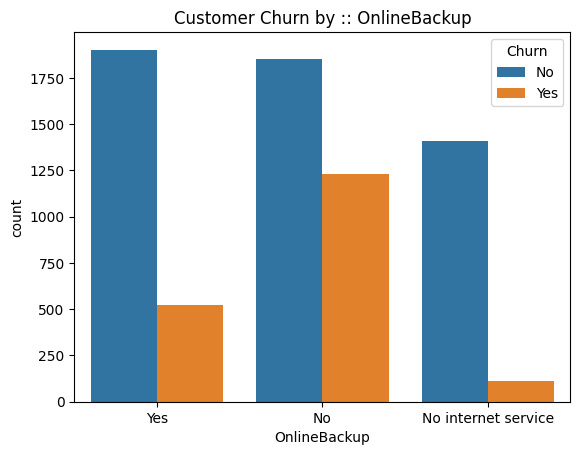

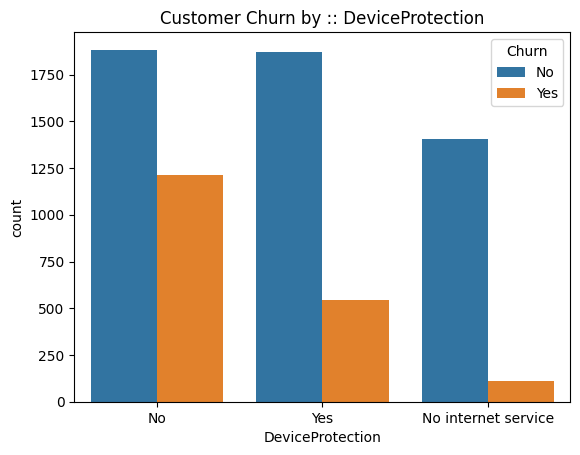

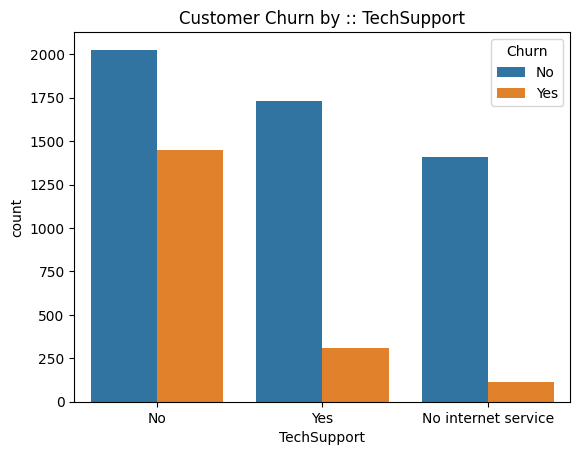

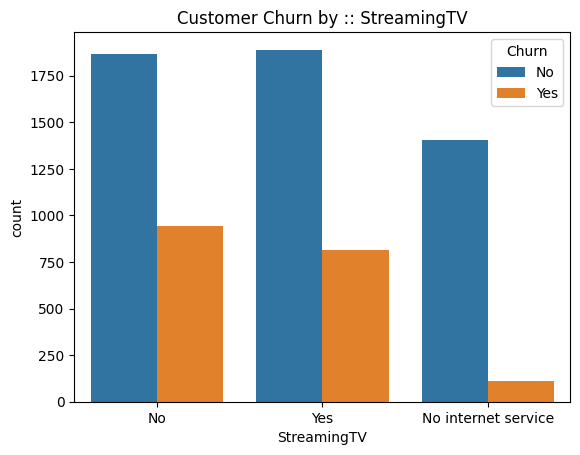

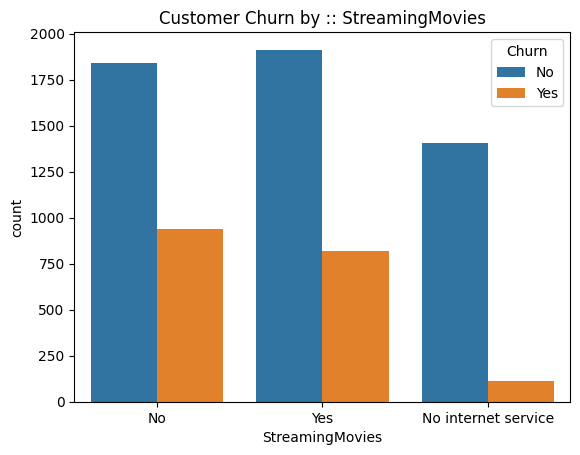

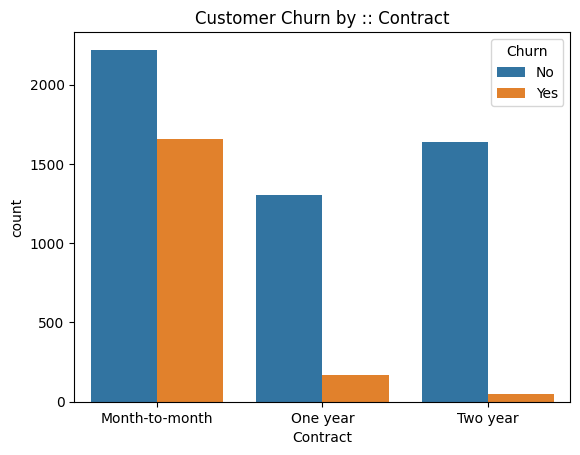

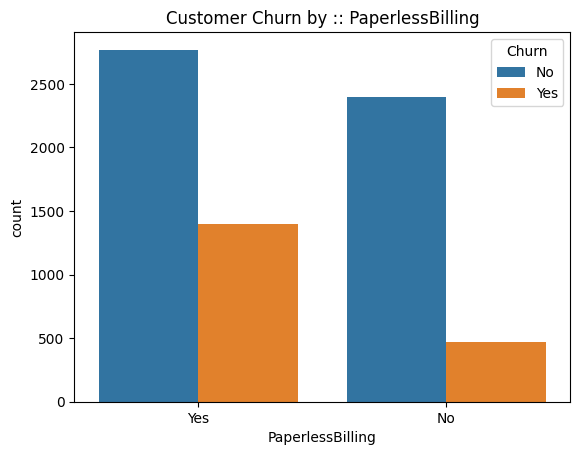

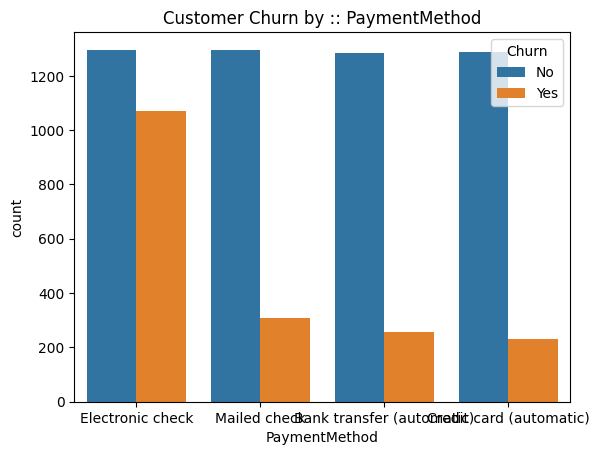

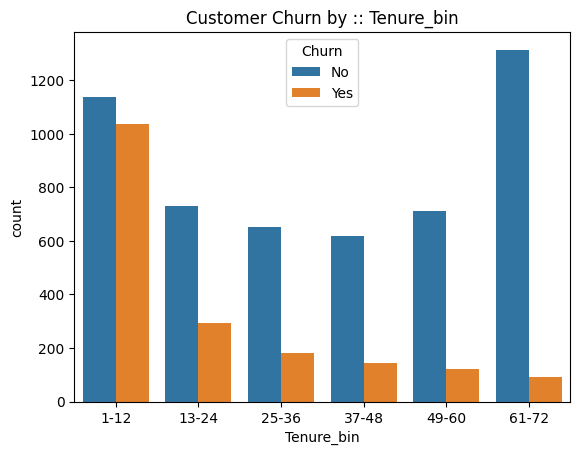

In [107]:
#part 3:: Analysis :: 
# Univariate Analysis :: Do for all categorical variables . Exclude Numerical cols as Numerical analysis done
#

for i,predictor in enumerate(datadf_clean.drop(columns=['Churn','MonthlyCharges','TotalCharges'])) : 
    plt.figure(i)
    sns.countplot(data=datadf_clean, x=predictor, hue='Churn')
    plt.title('Customer Churn by :: ' + predictor)
    plt.show()

In [108]:
import plotly.express as px
for i,predictor in enumerate(datadf_clean.drop(columns=['Churn','MonthlyCharges','TotalCharges'])) : 
    plt.figure(i)
    px.histogram(datadf_clean, x=predictor, color='Churn', barmode='group', title='Customer Churn by :: ' + predictor).show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [109]:
# Numerical Analysis :: 
#crosstab() -  compute a frequency table of two or more factors (or variables)- analyze b/w categorical variables
pd.crosstab(datadf_clean['PaymentMethod'],datadf_clean['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [ ]:
#convert or update the target variable to numeric

datadf_clean['Churn'] = datadf_clean['Churn'].map({'Yes':1,'No':0})
datadf_clean['Churn'].head()
#datadf['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
# convert all categorical variables to numerical via get_dummies() - create dummy variables using Feature Encoding
datadf_dummy = pd.get_dummies(datadf_clean)
datadf_dummy.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_bin_1-12,Tenure_bin_13-24,Tenure_bin_25-36,Tenure_bin_37-48,Tenure_bin_49-60,Tenure_bin_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


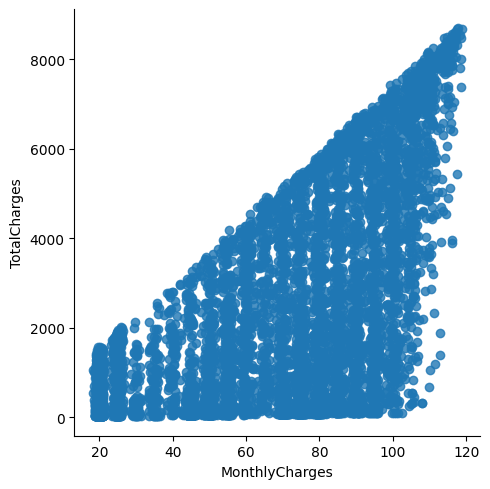

In [ ]:
#plot the relationship b/w MonthlyCharges and TotalCharges
sns.lmplot(data=datadf_dummy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [114]:
#get the correlation of a particular 2 numerical variables

datadf_dummy['MonthlyCharges'].corr(datadf_dummy['TotalCharges'])

0.6510648032262025

C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3077136053.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3077136053.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




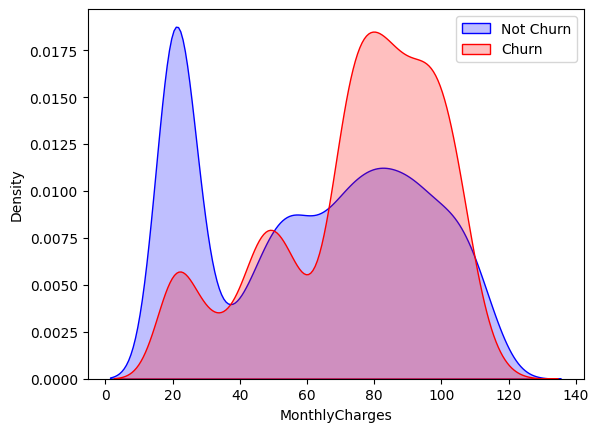

In [123]:
tot = sns.kdeplot(data=datadf_dummy.MonthlyCharges[(datadf_dummy["Churn"] == 0)], color="Blue",shade=True)
tot = sns.kdeplot(data=datadf_dummy.MonthlyCharges[(datadf_dummy['Churn'] == 1)],ax=tot ,color="Red",shade=True)
tot.legend(['Not Churn','Churn'])



C:\Users\hp\AppData\Local\Temp\ipykernel_11100\2910497414.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hp\AppData\Local\Temp\ipykernel_11100\2910497414.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




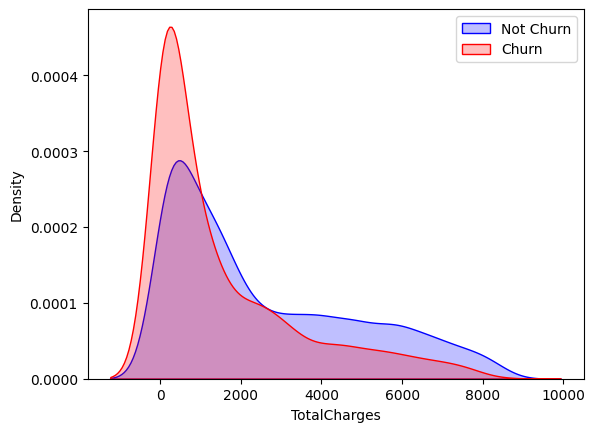

In [124]:
tot = sns.kdeplot(data=datadf_dummy.TotalCharges[(datadf_dummy["Churn"] == 0)], color="Blue",shade=True)
tot = sns.kdeplot(data=datadf_dummy.TotalCharges[(datadf_dummy['Churn'] == 1)],ax=tot ,color="Red",shade=True)
tot.legend(['Not Churn','Churn'])


<Axes: >

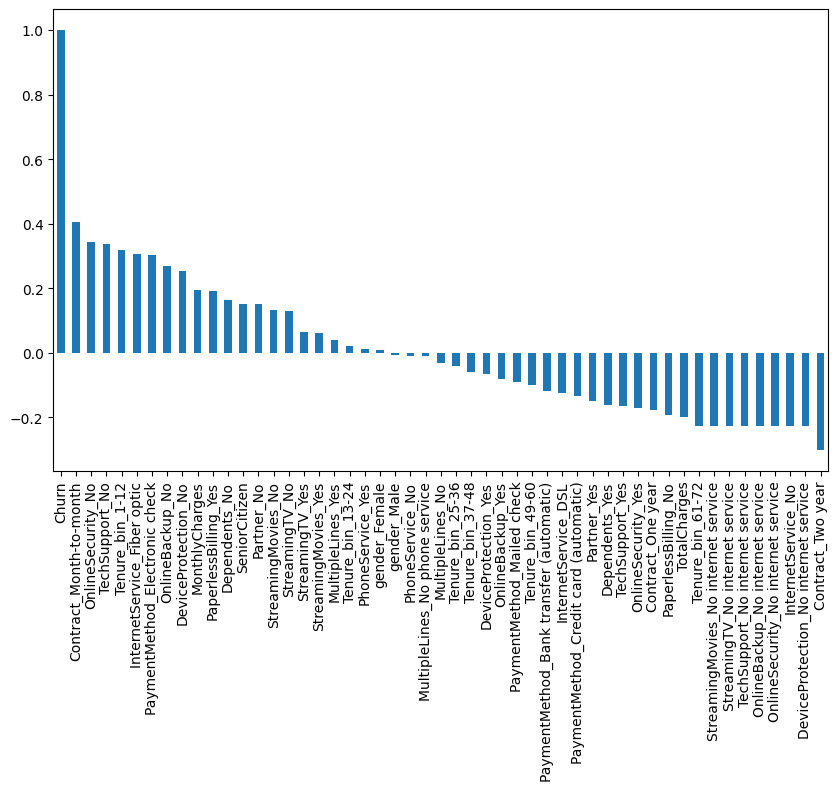

In [ ]:
#plot the correlation of all variables with target variable - Churn
datadf_dummy.corr()["Churn"].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

<Axes: >

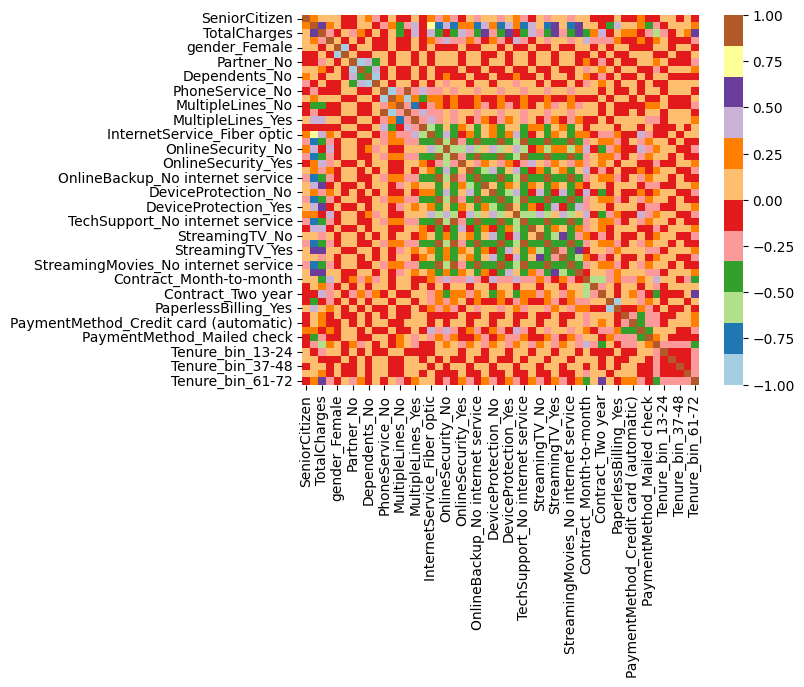

In [ ]:
#Use heatmap to see the correlation of all variables
sns.heatmap(datadf_dummy.corr(), annot=False, cmap='Paired')